<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/DL/09_1_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순차 데이터, 순환 신경망

순차 데이터 : 시계열 데이터 처럼 순서에 의미가 있는 데이터

<-> 피드 포워드 신경망 : 입력 데이터 흐름이 앞으로만 전달

## 순환 신경망
뉴런의 출력이 다시 자기 자신으로 전달됨.(입력 + 이전 은닉 상태)

데이터에 이전의 정보가 포함되나 타임 스텝이 오래될수록 순환되는 정보는 희미해짐

활성화 함수로 **tanh 함수** 사용(-1 ~ 1) -> 균형 잡힌 상태 표현(부정 상태 정보도 표현 가능, 출력이 0 중심), 없으면 값이 계속 누적됨->커지다가 폭발(기억 유지x)

이전 타임스텝의 은닉 상태에 곱해지는 가중치가 추가로 존재

한 층에 뉴런이 여러개면 한 뉴런의 출력은 다시 모든 뉴런에 들어감

하나의 샘플이 순환층 통과시 2차원 배열에서 1차원 배열로 바뀜(전체 시퀀스를 하나의 hidden state로 압축해서 1차원으로 보임(뉴런 개수), 마지막에 flatten할 필요 없음

CNN처럼 마지막엔 밀집층을 두어 클래스 구분
<br><br>

**타입 스텝** : 샘플을 처리하는 한 단계

**셀** : RNN에서 층을 셀이라고 부름(같은 셀을 시간축으로 복사해놓은게 RNN, 같은 가중치임 -> 일반화 성능 좋음), 여러 층 쌓기도 가능(층 깊이, 시간이 아님)

**은닉 상태** : 셀의 출력(입력에 가중치 곱하고 활성화 함수 통과 상태,지금까지 읽은 정보가 압축되어 저장된 기억 벡터),ht​=tanh(Wx​xt​+Wh​ht−1​), 처음엔 0임

h1=단어1 본 뒤 기억, h2=단어 1~2본 뒤 기억, h3=단어 1에서3 본 뒤 기억

마지막 hidden state만 밀집층에 들어감
<br><br>

**이전 은닉 상태 h0(가중치)** : 가중치 곱해서 이전 기억을 상황에 맞게 변경, 타입 스텝마다 같은 값,

** 시퀀스 ** : 샘플을 시퀀스 라고 함(2차원[시퀀스 길이, 단어 표현])






### IMDB분류

영화 리뷰를 긍정, 부정으로 분류해놓음. 정수로 바꾼 데이터도 포함.

정수 데이터는 원-핫 인코딩 배열로 바꿔야함(단점 : 용량 큼)

훈련,테스트 각각 25000개씩 넘파이 배열에 저장

토큰 : 영어 문장에서 모두 소문자로 바꾸고 구둣점 삭제 후 공백 기준으로 분리된 단어들, 1개의 토큰이 1개의 타임스텝

순환 신경망 만들기 위해선 이진 분류 이므로 마지막 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수를 써야함



In [31]:
from keras.datasets import imdb

# num_words -> 전체 데이터셋에서 자주 등장하는 단어 200개만보기(과적합 방지)
# 사전에 자주 등장하는 단어 순으로 인덱스 ㅇ되있음
(train_input, train_target), (test_input, test_target)= imdb.load_data(num_words=200)



218 189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]
239.00925 178.0


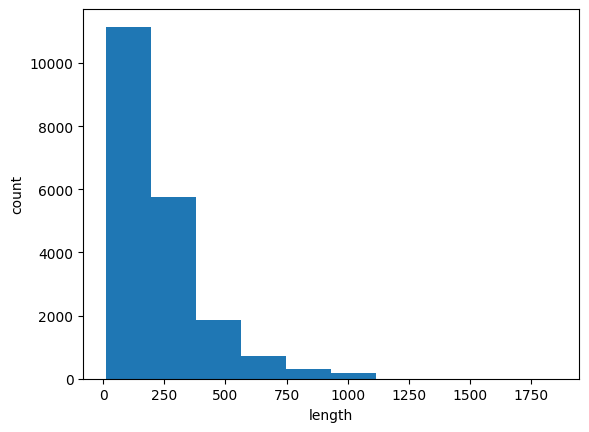

(20000, 100)


In [32]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 첫 번째, 두 번째 리뷰 길이
print(len(train_input[0]), len(train_input[1]))

# 첫 번째 리뷰 데이터 각 단어가 정수로 변환(사전에서 인덱스 값 찾아서, 200보다 크면 2로표시됨)
print(train_input[0])

# 리뷰가 긍정인지 부정인지, 0=부정, 1=긍정
print(train_target[:20])

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

# 각 리뷰의 길이를 계산해 넘파이 배열에 담기
lengths = np.array([len(x) for x in train_input])
# 리뷰 길이 평균값, 중간값
print(np.mean(lengths), np.median(lengths))

# 리뷰 길이 분포 히스토그램화
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

# 리뷰 길이 100으로 맞추기 위해 앞부분 자르기(보통 문장 뒤가 중요하기에 뒤에를 남김), 100정도로만 해도 정확도는 잘 나옴, 속도 때문에..
from keras.preprocessing.sequence import pad_sequences
# 100보다 길면 자르고 짧으면 0으로 패딩(앞부분을 0으로 채우기), 뒷부분 자르고 싶으면 truncating='post'넣기, 패딩 뒤에 하고 싶으면 padding='post'로
train_seq = pad_sequences(train_input, maxlen=100)
# 앞을 잘라서 길이가 100으로 맞춰짐
print(train_seq.shape)

# 검증 세트로 길이 100으로
val_seq= pad_sequences(val_input, maxlen=100)

In [33]:
# 훈련 데이터 변환

import keras

model = keras.Sequential()
# 100=샘플의 길이(시퀀스 길이), 200= 각 단어는 200차원 벡터(임베딩)
model.add(keras.layers.Input(shape=(100,200)))
# 순환신경망 층,활성화 함수 기본값 = tanh, 8=사용할 뉴런 개수(hidden state가 가질 수)(뉴런은 서로 다른 정보 축을 담당)
# 각 타임스텝마다 각 뉴런은 hidden_state+입력 값받아서 새로운 값 만듬. 이 값들은 벡터에 하나로 저장,다음 타임스텝의 8개 뉴런에 모두 연결된다. 마지막에 8개 hidden state남음
model.add(keras.layers.SimpleRNN(8))
# 출력층
model.add(keras.layers.Dense(1, activation='sigmoid'))


# 각 단어마다 사전을 통해 인덱스 값을 가지는데 이 값은 의미가 없음, 수가 크다고 큰 가중치 가지면 안됨
# 그래서 원-핫 인코딩으로 단어를 표현함
# 원-핫 인코딩 단점: 용량이 큼

# 자동으로 원-핫 인코딩 배열로 변환
train_oh = keras.utils.to_categorical(train_seq)
# 정수 하나마다 200차원 배열로 변경(200개 단어만 보기 때문)
print(train_oh.shape)
# 첫 번째 샘플의 첫 번째 토큰은 10인데 이걸 출력해봄 10인덱스 값이 1임
print(train_oh[0][0][:12])

val_oh = keras.utils.to_categorical(val_seq)

# 순환층 출력은 8임(뉴런 개수) 가중치 개산
model.summary()

(20000, 100, 200)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:

# 훈련

# 이진 분류 문제이므로 binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.5541 - loss: 0.6875 - val_accuracy: 0.6718 - val_loss: 0.6140
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.6908 - loss: 0.5945 - val_accuracy: 0.7100 - val_loss: 0.5759
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7185 - loss: 0.5676 - val_accuracy: 0.7040 - val_loss: 0.5750
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7172 - loss: 0.5663 - val_accuracy: 0.7202 - val_loss: 0.5669
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7210 - loss: 0.5572 - val_accuracy: 0.7158 - val_loss: 0.5681
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7282 - loss: 0.5456 - val_accuracy: 0.7108 - val_loss: 0.5668
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7317 - loss: 0.5399 - val_accuracy: 0.7282 - val_loss: 0.5516
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7341 - loss: 0.5404 

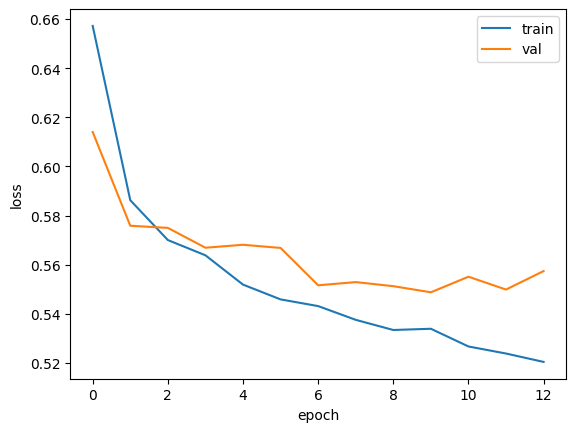

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 단어 임베딩

각 단어를 고정된 크기의 실수 벡터로 바꿈

원-핫 인코딩 보다 의미 있는 값들로 채워져서 좋은 성능

메모리를 절약 가능

keras.layers.Embedding에서 임베딩 기능 제공하고 입력으로 정수 데이터 받음(train_seq사용 가능)



In [36]:
(train_input, train_target), (test_input, test_target)= imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
# 데이터 길이 자르기
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

model_emb = keras.Sequential()
# val_seq = pad_sequences(val_input, maxlen=100)여기서 길이 100맞춘 것처럼 길이 맞춰야함
model_emb.add(keras.layers.Input(shape=(100,)))
# 임베딩 벡터를 만드는 층, 500=사전에서 가져올 단어 개수, 16=각 단어 표현할 벡터 (크기)차원 수 [0.1, -0.2....0.6]16
model_emb.add(keras.layers.Embedding(500,16))
model_emb.add(keras.layers.SimpleRNN(8))
model_emb.add(keras.layers.Dense(1, activation='sigmoid'))

model_emb.summary()

model_emb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_emb.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5189 - loss: 0.6921 - val_accuracy: 0.6958 - val_loss: 0.6209
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.6034 - loss: 0.6593 - val_accuracy: 0.7010 - val_loss: 0.5918
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7136 - loss: 0.5754 - val_accuracy: 0.7230 - val_loss: 0.5640
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7073 - loss: 0.5778 - val_accuracy: 0.7396 - val_loss: 0.5395
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7577 - loss: 0.5209 - val_accuracy: 0.7510 - val_loss: 0.5260
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7784 - loss: 0.4838 - val_accuracy: 0.7622 - val_loss: 0.5160
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7806 - loss: 0.4800 - val_accuracy: 0.7564 - val_loss: 0.5212
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7845 - loss: 0.4716 

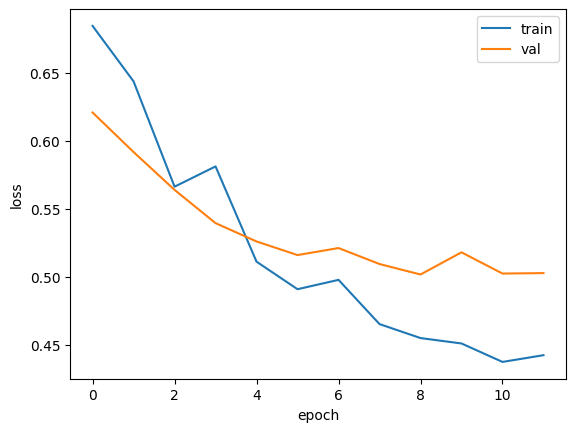

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()